In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b

2.620538882402765

In [4]:
a = ks.mean() - b * zp.mean()
a

444.1773573243596

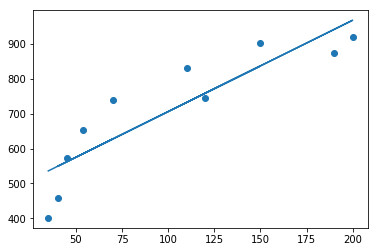

In [5]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp)

In [6]:
mse_ = np.sum(((a + b * zp) - ks) ** 2 / 10)
mse_


6470.414201176659

Вариант 2, без interсept

In [7]:
zp = zp.reshape(1, len(zp))
ks = ks.reshape(1, len(ks))

In [8]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[5.88982042]])

In [9]:
mse_ = np.sum(((0 + 5.88982042 * zp) - ks) ** 2 / 10)
mse_

56516.85841571942

In [10]:
def mse_(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [11]:
mse_(5.88982042)

56516.85841571943

С intercept

In [12]:
zp = np.vstack([np.ones((1, 10)), zp])

In [13]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[444.17735732],
       [  2.62053888]])

2\. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)

In [14]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [15]:
alpha = 1e-6

In [16]:
w1 = 0.1

In [17]:
def mse_(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [18]:
for i in range(1000):
    fp = (1 / 10) * np.sum(2 * (w1 * zp - ks) * zp)
    w1 -= alpha * fp
    if i % 100 == 0:
        print(f'iteration: {i}, w1 : {w1}, mse: {mse_(w1) }')
    

iteration: 0, w1 : 0.25952808000000005, mse: 493237.7212546963
iteration: 100, w1 : 5.54537842245223, mse: 58151.31823171113
iteration: 200, w1 : 5.868748638669329, mse: 56522.97550129376
iteration: 300, w1 : 5.888531320728348, mse: 56516.88130936019
iteration: 400, w1 : 5.8897415574471985, mse: 56516.85850140053
iteration: 500, w1 : 5.889815595583751, mse: 56516.858416040064
iteration: 600, w1 : 5.889820124983314, mse: 56516.85841572062
iteration: 700, w1 : 5.889820402076462, mse: 56516.85841571941
iteration: 800, w1 : 5.88982041902807, mse: 56516.8584157194
iteration: 900, w1 : 5.889820420065112, mse: 56516.85841571941


3\. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Сравнение двух средних выборок при известных дисперсиях осуществляется при помощи функции Лапласа. При неизвестных дисперсиях и, в случае если определение отлично от нормального и большой объем выборки, используется распределение Стьюдента